In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

reading data + basic info:

In [5]:
df = pd.read_csv('../data/raw/sales_ads_train.csv')

print('dataframe shape: {}'.format(df.shape))
df.head()

dataframe shape: (135397, 25)


,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,...,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
0,1,13900,PLN,Used,Renault,Grand Espace,Gr 2.0T 16V Expression,NaN,2005.0,213000.0,...,Manual,minivan,5.0,blue,NaN,NaN,NaN,28/04/2021,"SŁONECZNA 1 - 99-300 Kutno, kutnowski, Łódzkie...","['ABS', 'Electric front windows', 'Drivers air..."
1,2,25900,PLN,Used,Renault,Megane,1.6 16V 110,III (2008-2016),2010.0,117089.0,...,Manual,station_wagon,5.0,silver,NaN,NaN,16/06/2010,04/05/2021,"ul. Wiosenna 8 - 41-407 Imielin, Centrum (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
2,3,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,C (2011-2019),2015.0,115600.0,...,Manual,minivan,5.0,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Passengers ..."
3,4,5999,PLN,Used,Ford,Focus,1.6 TDCi FX Silver / Silver X,Mk2 (2004-2011),2007.0,218000.0,...,Manual,compact,5.0,blue,NaN,NaN,27/11/2007,02/05/2021,"Gdańsk, Pomorskie, Przymorze Wielkie","['ABS', 'Electric front windows', 'Drivers air..."
4,5,44800,PLN,Used,Toyota,Avensis,1.8,III (2009-),2013.0,NaN,...,Manual,NaN,4.0,other,Poland,Yes,20/05/2013,02/05/2021,"Świdnik, świdnicki, Lubelskie","['ABS', 'Electric front windows', 'Drivers air..."


finding data types, missing values (if any):

In [6]:
print('info on data: {}'.format(df.info()))

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135397 entries, 0 to 135396
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          135397 non-null  int64  
 1   Cena                        135397 non-null  int64  
 2   Waluta                      132021 non-null  object 
 3   Stan                        132075 non-null  object 
 4   Marka_pojazdu               132046 non-null  object 
 5   Model_pojazdu               132088 non-null  object 
 6   Wersja_pojazdu              87336 non-null   object 
 7   Generacja_pojazdu           93737 non-null   object 
 8   Rok_produkcji               131990 non-null  float64
 9   Przebieg_km                 131394 non-null  float64
 10  Moc_KM                      131664 non-null  float64
 11  Pojemnosc_cm3               130711 non-null  float64
 12  Rodzaj_paliwa               131987 non-null  object 
 13  Emisja_CO2    

,ID,Cena,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Emisja_CO2,Liczba_drzwi
count,135397.000000,1.353970e+05,131990.000000,1.313940e+05,131664.000000,130711.000000,5.949700e+04,131033.000000
mean,67699.000000,6.306938e+04,2012.089901,1.531563e+05,151.716696,1881.811753,3.363019e+05,4.635611
std,39085.891536,8.807748e+04,7.003557,3.421378e+06,77.386471,727.605417,8.199407e+07,0.780062
min,1.000000,5.850000e+02,1923.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,33850.000000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,67699.000000,3.580000e+04,2013.000000,1.448635e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,101548.000000,7.599000e+04,2017.000000,2.060000e+05,173.000000,1997.000000,1.640000e+02,5.000000
max,135397.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


missing values analysis:

In [7]:
missing_values = df.isnull().sum()

print('missing values in each col: {}'.format(missing_values))

missing values in each col: ID                                0
Cena                              0
Waluta                         3376
Stan                           3322
Marka_pojazdu                  3351
Model_pojazdu                  3309
Wersja_pojazdu                48061
Generacja_pojazdu             41660
Rok_produkcji                  3407
Przebieg_km                    4003
Moc_KM                         3733
Pojemnosc_cm3                  4686
Rodzaj_paliwa                  3410
Emisja_CO2                    75900
Naped                         13054
Skrzynia_biegow                3775
Typ_nadwozia                   3359
Liczba_drzwi                   4364
Kolor                          3463
Kraj_pochodzenia              60420
Pierwszy_wlasciciel           94514
Data_pierwszej_rejestracji    80698
Data_publikacji_oferty         3449
Lokalizacja_oferty             3341
Wyposazenie                    3253
dtype: int64


basic visualizations:

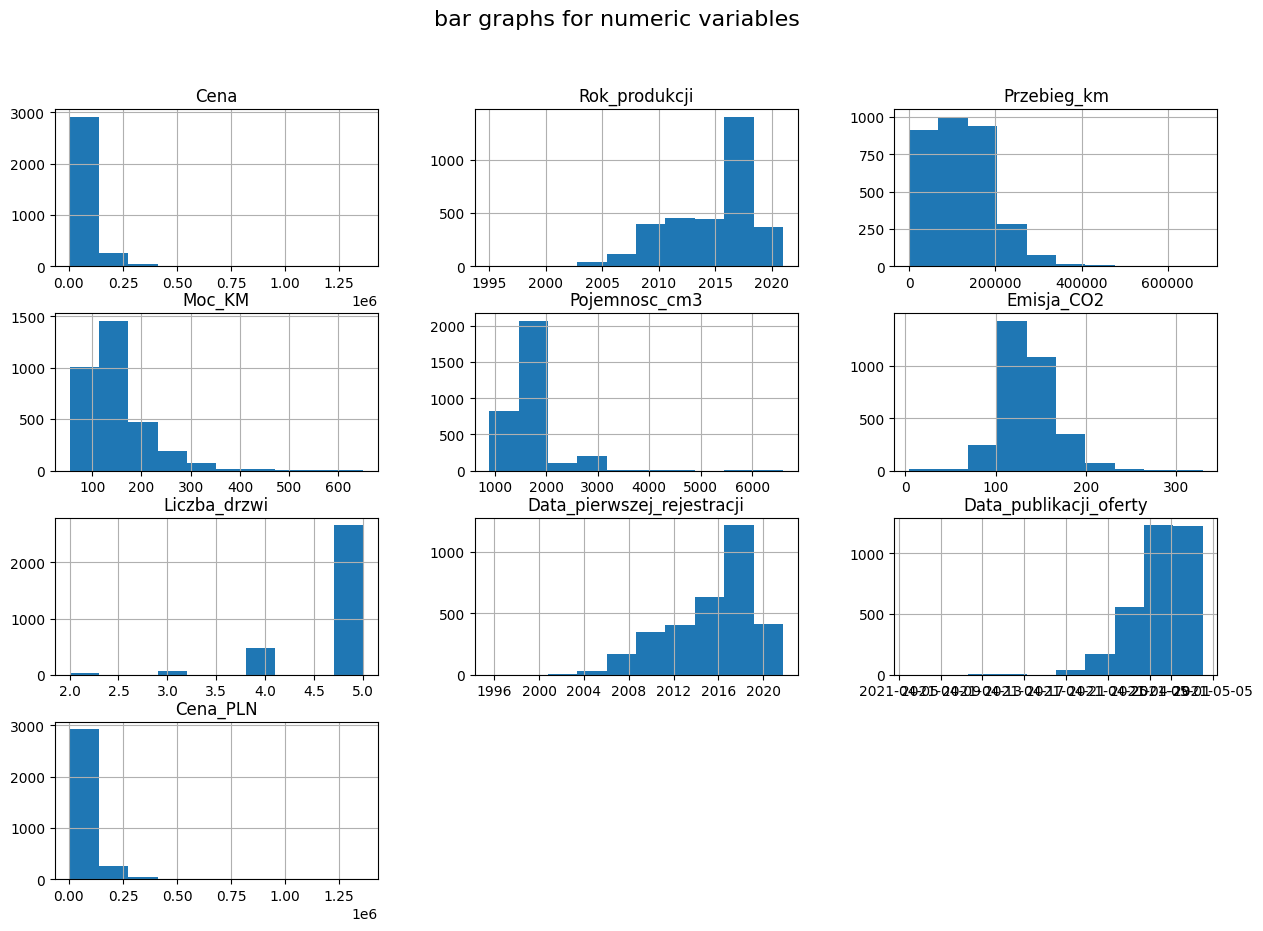

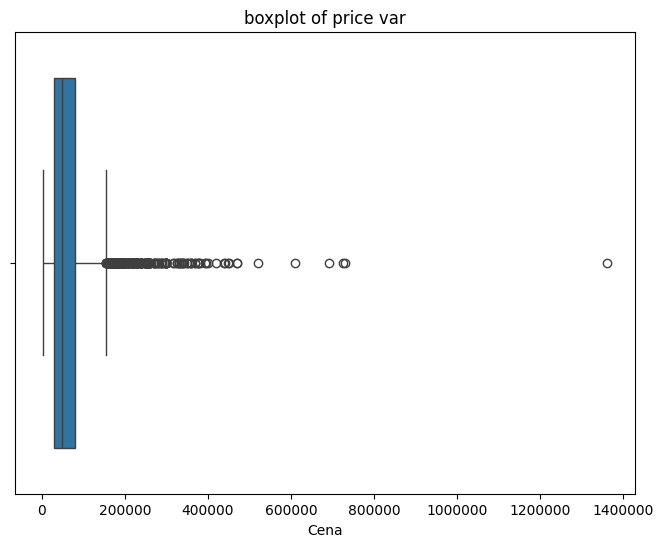

In [73]:
# cleaning missing values 
df = df.dropna()

df.drop('ID', axis=1).hist(figsize=(15, 10))
plt.suptitle("bar graphs for numeric variables", fontsize=16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# boxplot for 'price' outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Cena')
plt.title('boxplot of price var')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Cena_PLN
49900.0     46
39900.0     43
29900.0     36
42900.0     30
59900.0     28
            ..
148830.0     1
61800.0      1
105780.0     1
98400.0      1
8200.0       1
Name: count, Length: 1152, dtype: int64


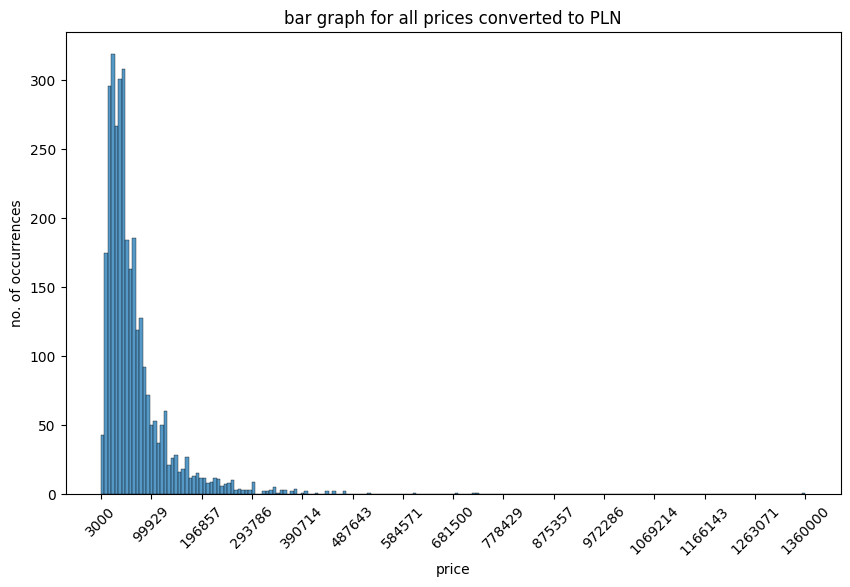

In [67]:
currencies = df['Waluta'].unique().tolist()

conversion_rates = {'EUR': 4.18, 'PLN': 1.0}
df['Cena_PLN'] = df.apply(lambda row: round(row['Cena'] * conversion_rates.get(row['Waluta'], 1), 0), axis = 1)

print(df['Cena_PLN'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(df['Cena_PLN'])
plt.title('bar graph for all prices converted to PLN')
plt.xlabel('price')
plt.ylabel('no. of occurrences')

min = df['Cena_PLN'].min()
max = df['Cena_PLN'].max()

ticks = np.linspace(min, max, num=15)
plt.xticks(ticks, rotation=45)

plt.ticklabel_format(style='plain', axis='x')

plt.show()


correlation matrix for numeric variables:

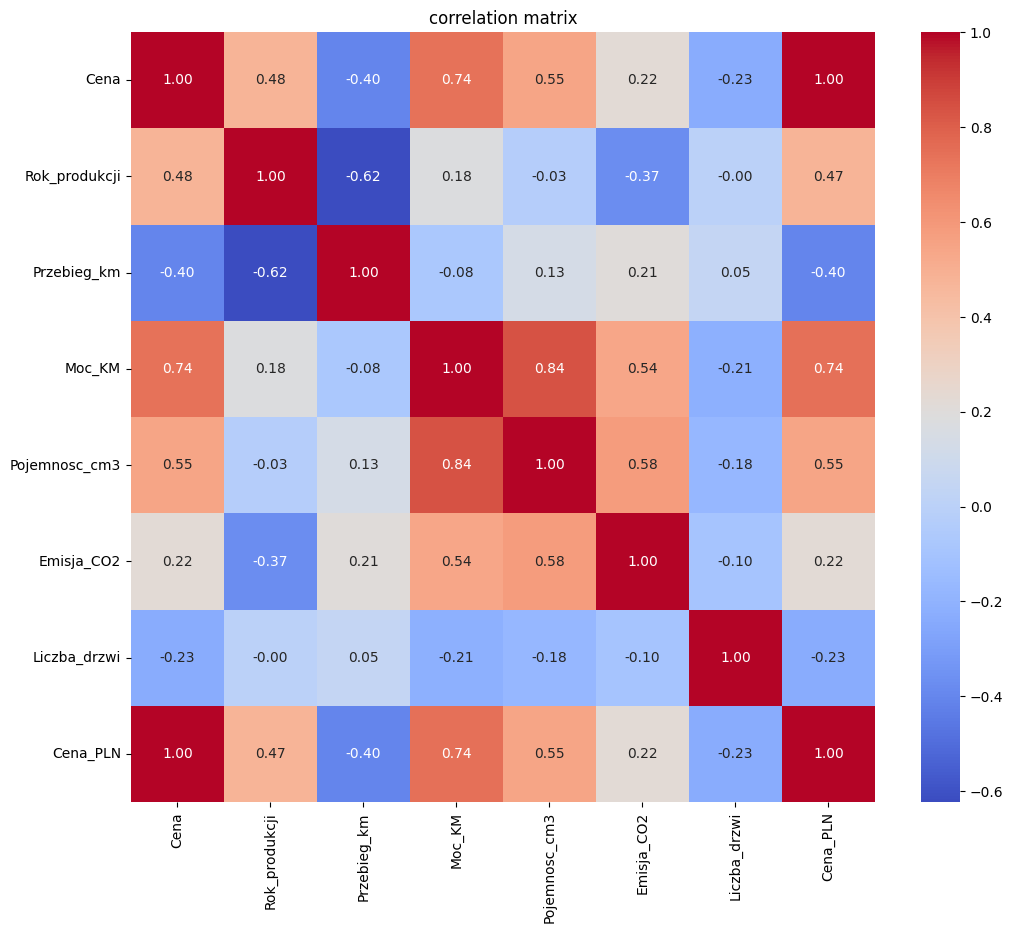

In [78]:
numeric_cols = df.select_dtypes(include=['number']).drop('ID', axis=1)
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("correlation matrix")
plt.show()

ads per date:

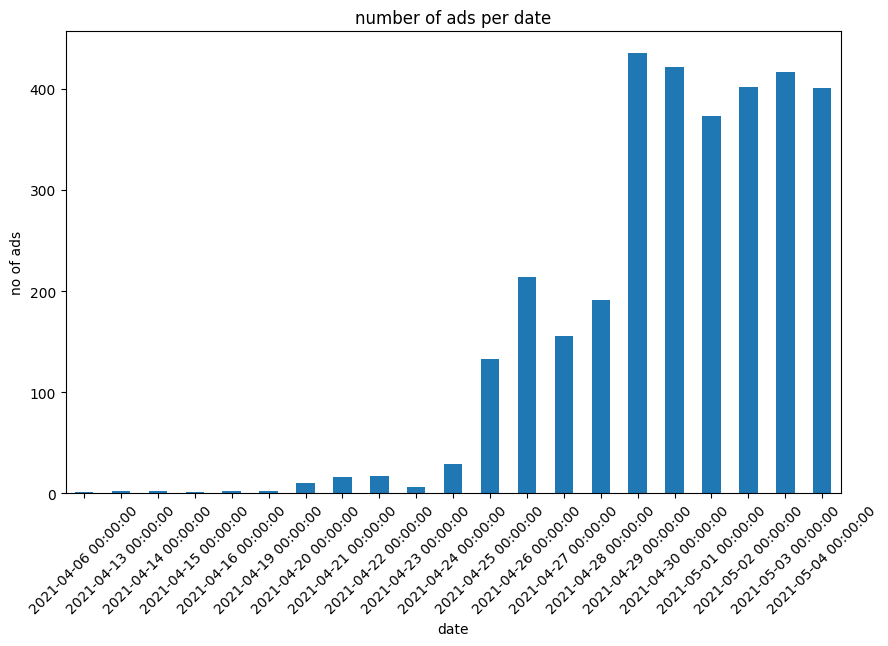

In [79]:
df['Data_pierwszej_rejestracji'] = pd.to_datetime(df['Data_pierwszej_rejestracji'], format="%d/%m/%Y", errors='coerce')
df['Data_publikacji_oferty'] = pd.to_datetime(df['Data_publikacji_oferty'], format="%d/%m/%Y", errors='coerce')

ads_sorted = df['Data_publikacji_oferty'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ads_sorted.plot(kind='bar')
plt.xlabel("date")
plt.ylabel("no of ads")
plt.title("number of ads per date")
plt.xticks(rotation=45)
plt.show()

analysis of correlation between price & other variables:

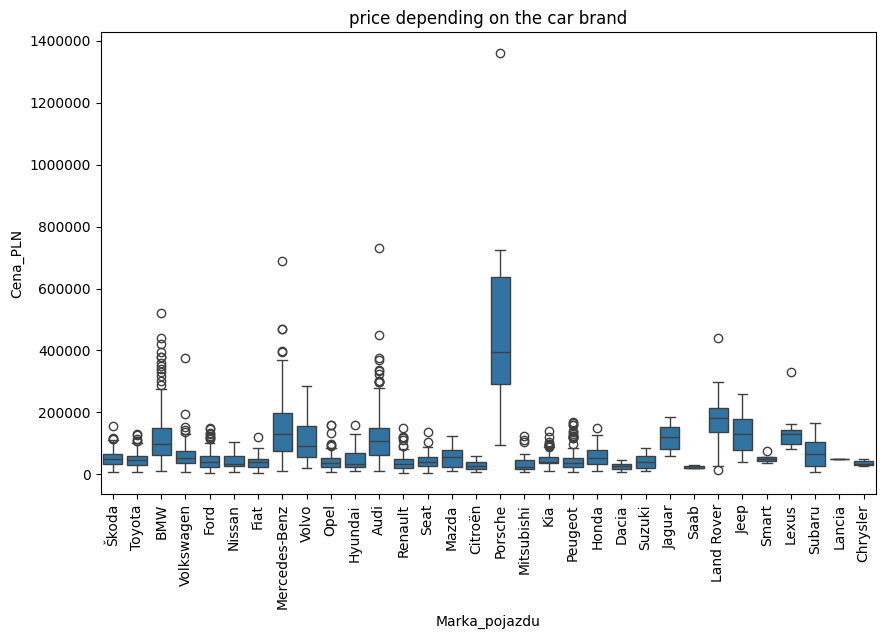

In [85]:
# car brand boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marka_pojazdu', y='Cena_PLN')
plt.title('price depending on the car brand')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

graph for average price by car brand:

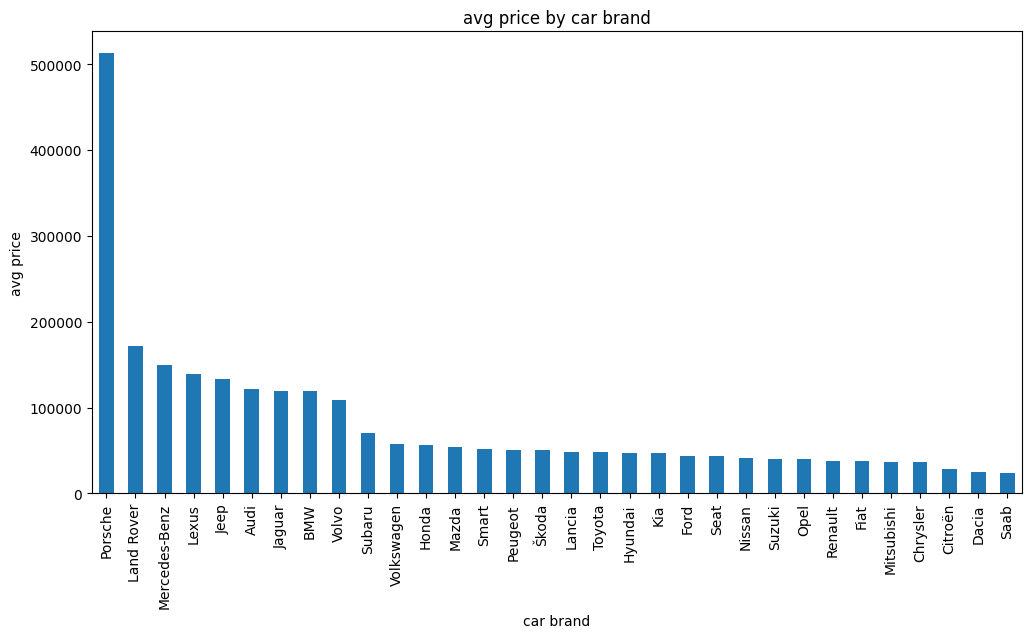

In [86]:
avg_price_by_brand = df.groupby('Marka_pojazdu')['Cena'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_price_by_brand.plot(kind='bar')
plt.xlabel("car brand")
plt.ylabel("avg price")
plt.title("avg price by car brand")
plt.xticks(rotation=90)
plt.show()

number of ads by location:

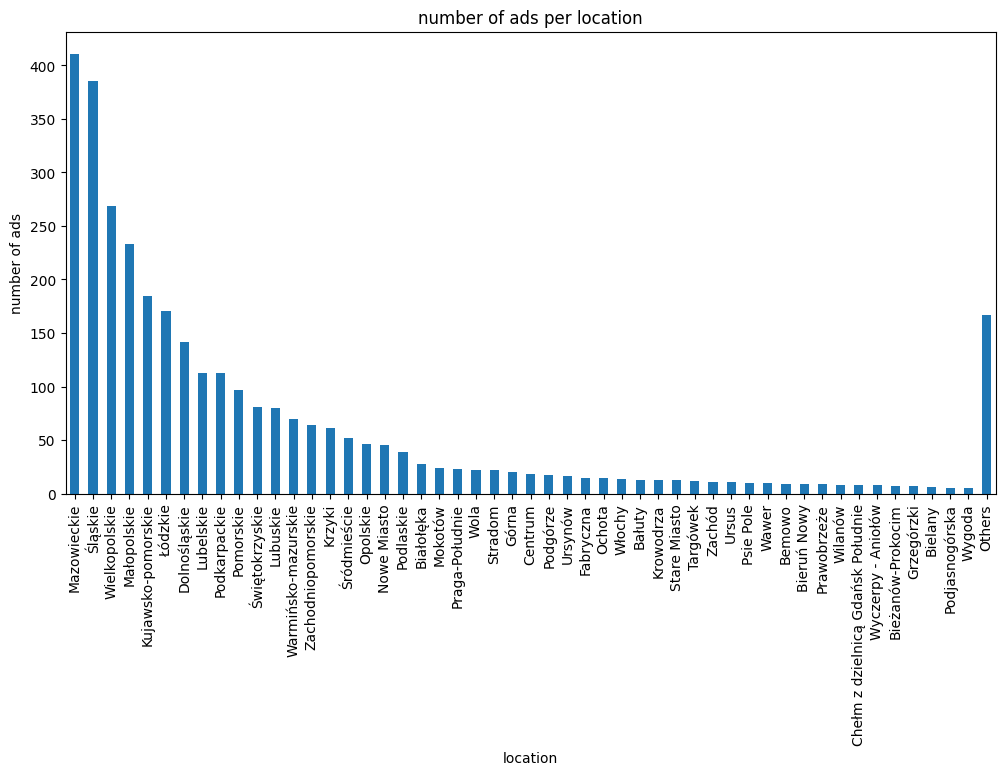

In [102]:
def extract_region_country(location):
    if pd.isnull(location):
        return None
    parts = location.split(',')
    result = parts[-1].strip() if parts else location
    result = result.replace("(Polska)", "").strip()
    return result

df['Region_Country'] = df['Lokalizacja_oferty'].apply(extract_region_country)
ads_by_region_country = df['Region_Country'].value_counts()

top_no = 50
top = ads_by_region_country.head(top_no).copy()
others = ads_by_region_country.iloc[top_no:].sum()
top["Others"] = others

plt.figure(figsize=(12,6))
top.plot(kind='bar')
plt.xlabel('location')
plt.ylabel('number of ads')
plt.title('number of ads per location')
plt.xticks(rotation=90)
plt.show()

